<a href="https://colab.research.google.com/github/nikm7777/D-code/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import sklearn
import seaborn as sns

In [ ]:
data=pd.read_csv('copper.csv')
data=data.sort_values('x')

In [ ]:
x=data['x'].to_numpy()
y=data['y'].to_numpy()
y.shape


(59,)

Text(0.5, 0, 'Degree')

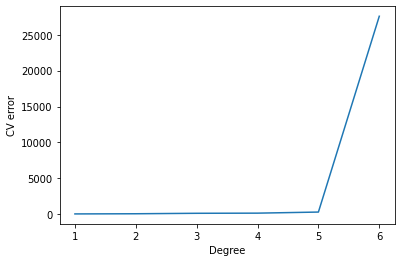

In [ ]:
model=LinearRegression()
poly=[]
poly_features=[]
sc=[]
for i in range(0,6):
  poly.append(PolynomialFeatures(degree=i+1, include_bias=False))
  poly_features.append(poly[i].fit_transform(x.reshape(-1, 1)))
  sc.append(-np.mean(cross_val_score(model,poly_features[i],y,cv=5,scoring='neg_mean_squared_error')))
plt.plot([1,2,3,4,5,6],sc)
plt.ylabel('CV error')
plt.xlabel('Degree')




In [ ]:
model.fit(poly_features[4],y)
pred=model.predict(poly_features[4][index])


In [ ]:
rmse=np.sqrt(np.mean((pred-y)**2))
rmse

0.2625152219222478

In [ ]:
def generate_results_dataset(preds, ci):
    df = pd.DataFrame()

    if ci >= 0:
        df['upper'] = preds + ci
        df['lower'] = preds - ci
    else:
        df['upper'] = preds - ci
        df['lower'] = preds + ci

    return df
residuals= pred-y
alpha=0.05
ci = np.quantile(residuals, 1 - alpha)
cbands=generate_results_dataset(pred,ci)

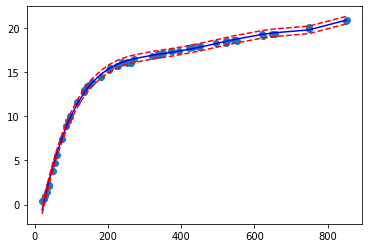

In [ ]:
plt.figure
plt.scatter(x,y)
plt.plot(x,pred, color='blue')
plt.plot(x,cbands,linestyle='dashed',color='red',label='confidence bands')


In [ ]:
df_cut, bins = pd.cut(x, 2, retbins=True, right=True)
df_cut.value_counts()

(19.319, 435.88]    42
(435.88, 851.61]    17
dtype: int64

In [ ]:
x=data['x'].to_numpy().reshape(-1,1)

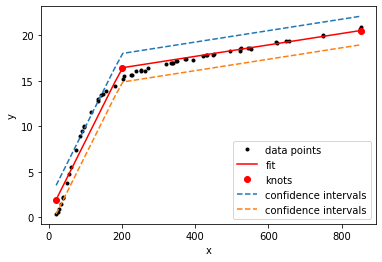

In [ ]:
from scipy.interpolate import LSQUnivariateSpline
import numpy as np
import matplotlib.pylab as plt


# Define wanted knot positions
knot_positions = np.array([200])

# Performe the spline fitting (degree=k)
spline = LSQUnivariateSpline(data['x'], data['y'], knot_positions, k=1)

# Graph
y_fit = spline(x)

x_knots = spline.get_knots()
y_knots = spline(x_knots)

pred=y_fit.flatten()
residuals= pred-y
alpha=0.05
ci = np.quantile(residuals, 1 - alpha)
cbands=generate_results_dataset(pred,ci)

plt.plot(x, y, '.', color='black', label='data points');
plt.plot(x, pred, '-', color='red', label='fit');
plt.plot(x_knots, y_knots, 'o', color='red', label='knots')
plt.plot(x,cbands,linestyle='dashed',label='confidence intervals')
plt.legend(); plt.xlabel('x'); plt.ylabel('y');

In [ ]:
rmse=np.sqrt(np.mean((pred-y)**2))
rmse

0.9559573569249252

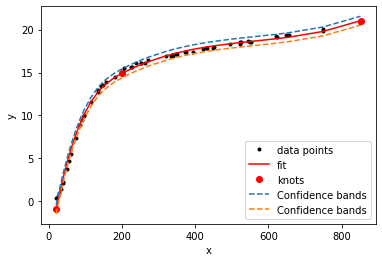

In [ ]:
# Define wanted knot positions
knot_positions = np.array([200])

# Performe the spline fitting (degree=k)
spline = LSQUnivariateSpline(data['x'], data['y'], knot_positions, k=3)

# Graph
y_fit = spline(x)

x_knots = spline.get_knots()
y_knots = spline(x_knots)

pred=y_fit.flatten()
residuals= pred-y
alpha=0.05
ci = np.quantile(residuals, 1 - alpha)
cbands=generate_results_dataset(pred,ci)

plt.plot(x, y, '.', color='black', label='data points');
plt.plot(x, pred, '-', color='red', label='fit');
plt.plot(x_knots, y_knots, 'o', color='red', label='knots')
plt.plot(x,cbands,linestyle='dashed',label='Confidence bands')
plt.legend(); plt.xlabel('x'); plt.ylabel('y');

In [ ]:
rmse=np.sqrt(np.mean((pred-y)**2))
rmse

0.31305550170622704

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.interpolate import UnivariateSpline

In [ ]:
from scipy.interpolate import UnivariateSpline
e=[]
t_error=[]
s=np.arange(0,1,0.1)
for i in s:
  for j in range(10):
      X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1,shuffle=False)
      X_train=np.ravel(X_train)
      X_test=np.ravel(X_test)
      spl = UnivariateSpline(X_train, y_train, s=i)
      e.append(np.sqrt(np.mean((spl(X_test)-y_test)**2)))
  t_error.append(np.mean(e))
  e=[]

In [ ]:
t_error

[339.82741376982256,
 279.59786909359906,
 59.62314189086128,
 7.3519997310461305,
 1.2117768777430376,
 1.331351853759196,
 0.17462125857695107,
 0.3249103318050935,
 0.42524122419052945,
 0.5057753887762326]

Text(0, 0.5, 'CV error')

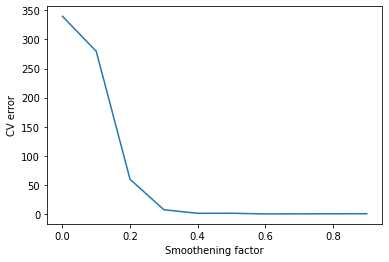

In [ ]:
plt.plot(s,t_error)
plt.xlabel('Smoothening factor')
plt.ylabel('CV error')

In [ ]:
s[np.argmin(t_error)]

0.6000000000000001

In [ ]:
 spl = UnivariateSpline(data['x'], data['y'],s=0.6)

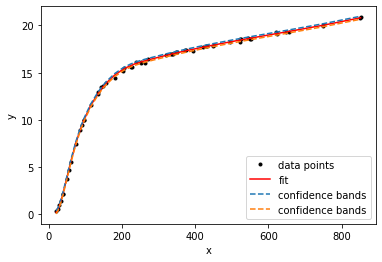

In [ ]:
pred=spl(data['x'])
residuals= pred-y
alpha=0.05
ci = np.quantile(residuals, 1 - alpha)
cbands=generate_results_dataset(pred,ci)

plt.plot(x, y, '.', color='black', label='data points');
plt.plot(x, pred, '-', color='red', label='fit');
plt.plot(x,cbands,linestyle='dashed',label='confidence bands')
plt.legend(); plt.xlabel('x'); plt.ylabel('y');

In [ ]:
rmse=np.sqrt(np.mean((pred-y)**2))
rmse

0.10083524664052233

In [ ]:
import numpy as np
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
w = lowess(data['y'].to_numpy(), data['x'].to_numpy(), frac=1./4)

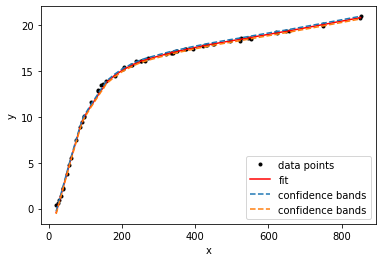

In [ ]:
residuals= w[:,1]-y
alpha=0.05
ci = np.quantile(residuals, 1 - alpha)
cbands=generate_results_dataset(w[:,1],ci)

plt.plot(x, y, '.', color='black', label='data points');
plt.plot(data['x'], w[:,1], '-', color='red', label='fit');
plt.plot(x,cbands,linestyle='dashed',label='confidence bands')
plt.legend(); plt.xlabel('x'); plt.ylabel('y');

In [ ]:
rmse=np.sqrt(np.mean((w[:,1]-y)**2))
rmse

0.2175596110374746

ANS.3

In [ ]:
from sklearn.model_selection import train_test_split
data=pd.read_csv('college.csv')
data.shape

(777, 18)

In [ ]:
data=data.replace('Yes',1)
data=data.replace('No',0)

In [ ]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
x=data.loc[:,~data.columns.isin(['Outstate'])]
y=data['Outstate']

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

train_x.shape

(621, 17)

In [ ]:
y_train=y_train.ravel()
y_test=y_test.ravel()

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model=LinearRegression()
feat=[]
featn=[]
for i in range(17):
  sfs = SFS(model,
           k_features=i+1,
           forward=True,
           floating=False,
           scoring='neg_mean_squared_error',
           cv=10)
  sfs = sfs.fit(train_x,train_y)
  feat.append(list(sfs.k_feature_idx_))
  featn.append(list(sfs.k_feature_names_))


In [ ]:
bic=[]
for i in feat:
  x=train_x.iloc[:,i]
  sm.add_constant(x)
  y=train_y
  model=sm.OLS(y,x).fit()
  bic.append(model.bic)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 0, 'Number of predictors')

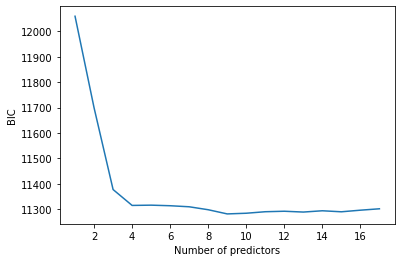

In [ ]:
plt.plot(list(range(1,18,1)),bic)
plt.ylabel('BIC')
plt.xlabel('Number of predictors')

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(train_x.iloc[:,feat[4]],train_y)

LinearRegression()

In [ ]:
pred=model.predict(test_x.iloc[:,feat[4]])

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)


0.7459721061183995

In [ ]:
featn[4]

['Private', 'RoomBoard', 'Terminal', 'PercAlumni', 'Expend']

In [ ]:
train_x = train_x.rename(columns={'perc.alumni':'PercAlumni', 'Room.Board':'RoomBoard'})
test_x = test_x.rename(columns={'perc.alumni':'PercAlumni', 'Room.Board':'RoomBoard'})
data1=train_x.copy()
data1['Outstate']=train_y.to_numpy()

In [ ]:
#fit simple linear regression model
from statsmodels.regression.linear_model import OLS
model = ols('Outstate ~ Private+RoomBoard+Terminal+PercAlumni+Expend', data=data1).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     338.9
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          4.93e-174
Time:                        03:29:33   Log-Likelihood:                -5623.1
No. Observations:                 621   AIC:                         1.126e+04
Df Residuals:                     615   BIC:                         1.128e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3229.4014    525.784     -6.142      0.0

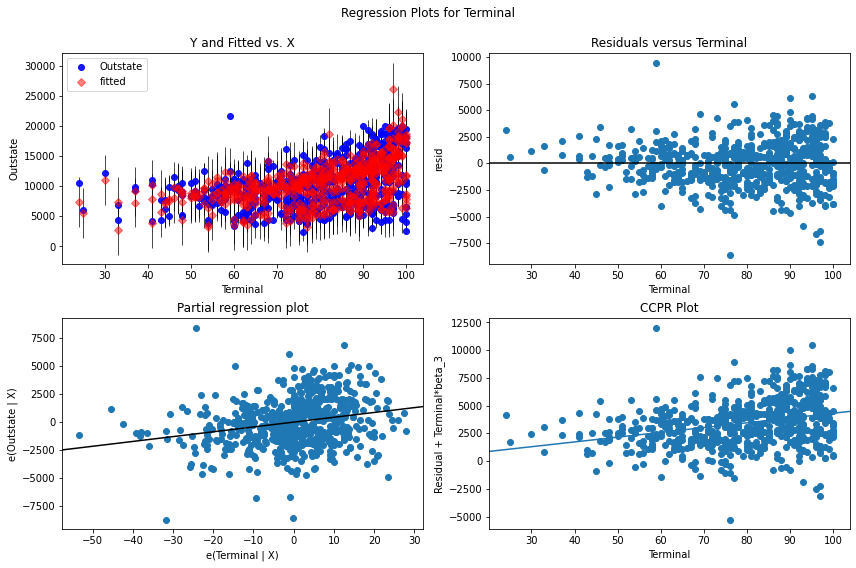

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Terminal', fig=fig)

In [ ]:
pred=model.predict(test_x.iloc[:,feat[4]])

In [ ]:
residuals=test_y-pred

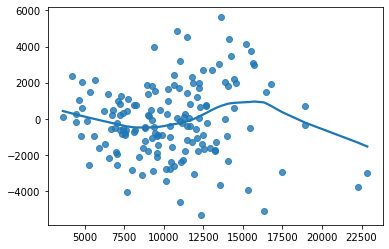

In [ ]:
import seaborn as sns
sns.regplot(x=pred,y=residuals,lowess=True)

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)


0.7459721061184392

In [ ]:
pip install pygam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pygam import LinearGAM, s, f
gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)).fit(train_x.iloc[:,feat[4]],train_y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.5394
Link Function:                     IdentityLink Log Likelihood:                                 -9941.1677
Number of Samples:                          621 AIC:                                            19973.4142
                                                AICc:                                           19980.7929
                                                GCV:                                          4100391.8979
                                                Scale:                                        3574668.4601
                                                Pseudo R-Squared:                                   0.7941
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pred=gam.predict(test_x.iloc[:,feat[4]])

In [ ]:
r2_score(test_y, pred)


0.7612289614222256

In [ ]:
residuals=test_y-pred

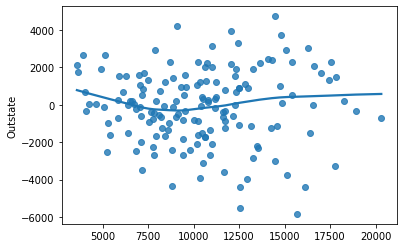

In [ ]:
import seaborn as sns
sns.regplot(x=pred,y=residuals,lowess=True)